<a href="https://colab.research.google.com/github/vanessaozogu/DM20/blob/master/assignment1_USA_flights_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href='https://www.altschoolafrica.com/'> <h2> Python for Data Engineering </h2></a>


# <center> CAPSTONE PROJECT 1 <br> 

## <center>Exploratory Data Analysis (EDA) of US flights <br> (using Pandas, Matplotlib & Seaborn)

<img src='altschool.jpeg' width=50%>


In [1]:
import numpy as np
import pandas as pd
# pip install seaborn 
import seaborn as sns
import matplotlib.pyplot as plt

Consider the following terms we use:
* unique flight - a record (row) in the dataset
* completed flight = flight that is not cancelled (Cancelled==0 in the dataset)
* flight code - a combination of ['UniqueCarrier','FlightNum'], i.e.  UA52
* airport code - a three letter airport alias from 'Origin or 'Dest' columns

**Reading data into memory and creating a Pandas ``DataFrame`` object**

(This may take a while, be patient)

We are not going to read in the whole dataset. In order to reduce memory footprint, we instead load only needed columns and cast them to suitable data types.

Use this [link](https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/HG7NV7/EIR0RA) to download the dataset and add the path to below to load to pandas. 

Run all the cell to confirm everything is running and then attempt the questions

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [3]:
dtype = {'DayOfWeek': np.uint8, 'DayofMonth': np.uint8, 'Month': np.uint8 , 
         'Cancelled': np.uint8, 'Year': np.uint16, 'FlightNum': np.uint16 , 
         'Distance': np.uint16, 'UniqueCarrier': str, 'CancellationCode': str, 
         'Origin': str, 'Dest': str, 'ArrDelay': np.float16, 
         'DepDelay': np.float16, 'CarrierDelay': np.float16, 
         'WeatherDelay': np.float16, 'NASDelay': np.float16, 
         'SecurityDelay': np.float16, 'LateAircraftDelay': np.float16, 
         'DepTime': np.float16}

In [4]:
%%time
# change the path if needed
path = "/content/2008.csv.bz2"
flights_df = pd.read_csv(path, usecols=dtype.keys(), dtype=dtype)

CPU times: user 15.1 s, sys: 534 ms, total: 15.6 s
Wall time: 15.7 s


**Check the number of rows and columns and print column names.**

In [5]:
print(flights_df.shape)
print(flights_df.columns)

(2389217, 19)
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


**Print first 5 rows of the dataset.**

In [6]:
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,WN,588,16.0,18.0,HOU,LIT,393,0,NaN,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,WN,1343,2.0,5.0,HOU,MAF,441,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,WN,3841,-4.0,-6.0,HOU,MAF,441,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,WN,3,-2.0,8.0,HOU,MCO,848,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,WN,25,16.0,23.0,HOU,MCO,848,0,NaN,16.0,0.0,0.0,0.0,0.0


**Transpose the frame to see all features at once.**

In [7]:
flights_df.head().T

,0,1,2,3,4
Year,2008,2008,2008,2008,2008
Month,1,1,1,1,1
DayofMonth,3,3,3,3,3
DayOfWeek,4,4,4,4,4
DepTime,1343.0,1125.0,2009.0,903.0,1423.0
UniqueCarrier,WN,WN,WN,WN,WN
FlightNum,588,1343,3841,3,25
ArrDelay,16.0,2.0,-4.0,-2.0,16.0
DepDelay,18.0,5.0,-6.0,8.0,23.0
Origin,HOU,HOU,HOU,HOU,HOU


**Examine data types of all features and total dataframe size in memory.**

In [8]:
miss_percent = 100 * (flights_df.isnull().sum()/len(flights_df))

In [ ]:
miss_percent

Year                  0.000000
Month                 0.000000
DayofMonth            0.000000
DayOfWeek             0.000000
DepTime               2.697202
UniqueCarrier         0.000000
FlightNum             0.000000
ArrDelay              2.933848
DepDelay              2.697202
Origin                0.000000
Dest                  0.000000
Distance              0.000000
Cancelled             0.000000
CancellationCode     97.302798
CarrierDelay         75.532444
WeatherDelay         75.532444
NASDelay             75.532444
SecurityDelay        75.532444
LateAircraftDelay    75.532444
dtype: float64

**Get basic statistics of each feature.**

In [9]:
flights_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2389217.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,2389217.0,2.505009,1.121493,1.0,1.0,3.0,4.0,4.0
DayofMonth,2389217.0,15.663856,8.750405,1.0,8.0,16.0,23.0,31.0
DayOfWeek,2389217.0,3.909625,1.980431,1.0,2.0,4.0,6.0,7.0
DepTime,2324775.0,NaN,NaN,1.0,930.0,1330.0,1733.0,2400.0
FlightNum,2389217.0,2213.887980,1951.392101,1.0,605.0,1544.0,3631.0,9741.0
ArrDelay,2319121.0,NaN,NaN,-91.0,-9.0,0.0,15.0,2460.0
DepDelay,2324775.0,NaN,NaN,-92.0,-4.0,0.0,11.0,2468.0
Distance,2389217.0,726.158911,557.176261,17.0,325.0,583.0,957.0,4962.0
Cancelled,2389217.0,0.026972,0.162002,0.0,0.0,0.0,0.0,1.0


**Count unique Carriers and plot their relative share of flights:**

In [10]:
flights_df['UniqueCarrier'].nunique()

20

In [11]:
flights_df.groupby('UniqueCarrier').size().sort_values(ascending=False)

UniqueCarrier
WN    398966
AA    204519
OO    195184
MQ    167860
UA    154036
US    153539
DL    151409
XE    138757
NW    122799
CO    102702
EV     92383
9E     88359
FL     86856
YV     85686
OH     71934
B6     67478
AS     49885
F9     30680
HA     18385
AQ      7800
dtype: int64

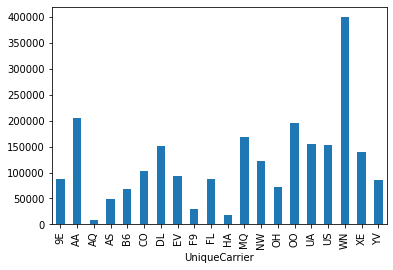

In [12]:
flights_df.groupby('UniqueCarrier').size().plot(kind='bar');

**We can also _group by_ category/categories in order to calculate different aggregated statistics.**

**For example, finding top-3 flight codes, that have the largest total distance travelled in year 2008.**

In [13]:
flights_df.groupby(['UniqueCarrier','FlightNum'])['Distance'].sum().sort_values(
    ascending=False).iloc[:3]

UniqueCarrier  FlightNum
UA             3            729366.0
CO             15           600402.0
               14           600402.0
Name: Distance, dtype: float64

**Another way:**

In [14]:
flights_df.groupby(['UniqueCarrier','FlightNum'])\
  .agg({'Distance': [np.mean, np.sum, 'count'],
        'Cancelled': np.sum})\
  .sort_values(('Distance', 'sum'), ascending=False)\
  .iloc[0:3]

Distance                 Cancelled
                            mean       sum count       sum
UniqueCarrier FlightNum                                   
UA            3           2827.0  729366.0   258         4
CO            15          4962.0  600402.0   121         0
              14          4962.0  600402.0   121         0

**Number of flights by days of week and months:**

In [15]:
pd.crosstab(flights_df.Month, flights_df.DayOfWeek)

DayOfWeek,1,2,3,4,5,6,7
Month,,,,,,,
1,80807,97298,100080,102043,81940,67178,76419
2,81504,79700,80587,82158,102726,66462,76099
3,103210,81159,82307,82831,82936,86153,97494
4,82463,100785,102586,82799,82964,68304,78225


**It can also be handy to color such tables in order to easily notice outliers:**

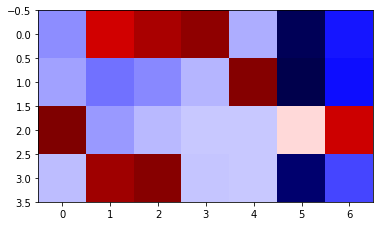

In [16]:
plt.imshow(pd.crosstab(flights_df.Month, flights_df.DayOfWeek),
           cmap='seismic', interpolation='none');

**Flight distance histogram:**

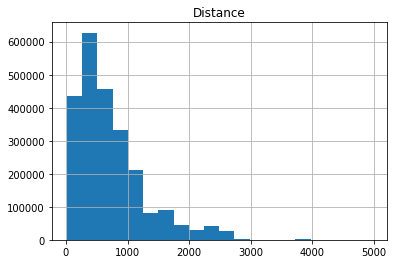

In [17]:
flights_df.hist('Distance', bins=20);

**Making a histogram of flight frequency by date.**

In [18]:
flights_df['Date'] = pd.to_datetime(flights_df.rename(
    columns={'DayofMonth': 'Day'})[['Year', 'Month', 'Day']])

In [19]:
num_flights_by_date = flights_df.groupby('Date').size()

<Axes: xlabel='Date'>

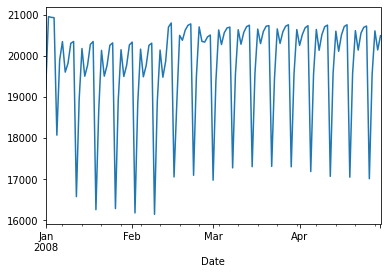

In [20]:
num_flights_by_date.plot()

**Do you see a weekly pattern above? And below?**

### Now it's your turn. Answer the questions below.

##### The next 20 questions is going to be very tasking so get ready, but don't worry it's easy

In [21]:
#Count of Completed and Cancelled. 
flights_df['Cancelled'].value_counts()
#The difference between both is 2260333

0    2324775
1      64442
Name: Cancelled, dtype: int64

In [22]:
flights_df.loc[flights_df['DepDelay'].idxmax()]

Year                                2008
Month                                  4
DayofMonth                            10
DayOfWeek                              4
DepTime                            724.0
UniqueCarrier                         NW
FlightNum                           1699
ArrDelay                          2452.0
DepDelay                          2468.0
Origin                               CLT
Dest                                 MSP
Distance                             930
Cancelled                              0
CancellationCode                     NaN
CarrierDelay                      2436.0
WeatherDelay                         0.0
NASDelay                             0.0
SecurityDelay                        0.0
LateAircraftDelay                   17.0
Date                 2008-04-10 00:00:00
Name: 2235384, dtype: object

In [24]:
flights_df.loc[flights_df['ArrDelay'].idxmax()]

Year                                2008
Month                                  2
DayofMonth                             3
DayOfWeek                              7
DepTime                           1117.0
UniqueCarrier                         NW
FlightNum                            808
ArrDelay                          2460.0
DepDelay                          2456.0
Origin                               HNL
Dest                                 MSP
Distance                            3972
Cancelled                              0
CancellationCode                     NaN
CarrierDelay                      1455.0
WeatherDelay                         0.0
NASDelay                             4.0
SecurityDelay                        0.0
LateAircraftDelay                 1002.0
Date                 2008-02-03 00:00:00
Name: 1018504, dtype: object

The carrier with the highest cancellation is AA with 10784

In [25]:
flights_df["DepTime"].isnull().values.any()

True

In [26]:
flights_df['DepTime'] = flights_df['DepTime'].astype(str).str.zfill(4)
flights_df['DepTime'].head(10)

0    1343.0
1    1125.0
2    2009.0
3     903.0
4    1423.0
5    2024.0
6    1753.0
7     622.0
8    1944.0
9    1453.0
Name: DepTime, dtype: object

In [27]:
flights_df['DepTime'] = flights_df['DepTime'].apply(lambda x: x.zfill(4))
flights_df['DepTime'].head(10)

0    1343.0
1    1125.0
2    2009.0
3     903.0
4    1423.0
5    2024.0
6    1753.0
7     622.0
8    1944.0
9    1453.0
Name: DepTime, dtype: object

In [28]:
flights_df['New_Deptime'] = flights_df['DepTime'].str[0:2]
flights_df['New_Deptime'].head()

0    13
1    11
2    20
3    90
4    14
Name: New_Deptime, dtype: object

The destination airport with the longest arrival and departure delay is the MSP airport with 2460 and 2468 minutes.

In [29]:
groups = flights_df.groupby(['Cancelled','UniqueCarrier']).size()
print(groups)

Cancelled  UniqueCarrier
0          9E                84262
           AA               193735
           AQ                 7758
           AS                49081
           B6                66576
           CO               101618
           DL               148358
           EV                90037
           F9                30582
           FL                85953
           HA                18273
           MQ               158900
           NW               121392
           OH                69316
           OO               188411
           UA               149420
           US               151149
           WN               394586
           XE               134832
           YV                80536
1          9E                 4097
           AA                10784
           AQ                   42
           AS                  804
           B6                  902
           CO                 1084
           DL                 3051
           EV                 

The carrier with the highest cancellation is AA with 10784

In [30]:
flights_df["DepTime"].isnull().values.any()

False

In [31]:
flights_df['DepTime'] = flights_df['DepTime'].astype(str).str.zfill(4)
flights_df['DepTime'].head(10)

0    1343.0
1    1125.0
2    2009.0
3     903.0
4    1423.0
5    2024.0
6    1753.0
7     622.0
8    1944.0
9    1453.0
Name: DepTime, dtype: object

In [32]:
flights_df['DepTime'] = flights_df['DepTime'].apply(lambda x: x.zfill(4))
flights_df['DepTime'].head(10)

0    1343.0
1    1125.0
2    2009.0
3     903.0
4    1423.0
5    2024.0
6    1753.0
7     622.0
8    1944.0
9    1453.0
Name: DepTime, dtype: object

In [33]:
flights_df['New_Deptime'] = flights_df['DepTime'].str[0:2]
flights_df['New_Deptime'].head()

0    13
1    11
2    20
3    90
4    14
Name: New_Deptime, dtype: object

In [34]:
results = flights_df.groupby(['Cancelled', 'New_Deptime']).size().sort_values(ascending=False)
results

Cancelled  New_Deptime
0          11             150214
           16             147800
           17             147614
           13             147255
           10             144795
                           ...  
           47                 99
           57                 88
           58                 80
           56                 75
           59                 61
Length: 84, dtype: int64

The time with the highest number of departing flights is 11am

In [35]:
results = flights_df.groupby(['Cancelled', 'Month']).size().sort_values(ascending=True)
results

Cancelled  Month
1          4         10355
           3         16183
           1         17308
           2         20596
0          2        548640
           4        587771
           1        588457
           3        599907
dtype: int64

The month with the highest number of cancelled flights is month 4

The months are only from Numbers 1-4. As such all the options in the questions do not apply.

In [36]:
completed_trips = flights_df[flights_df['Cancelled'] == 0]

In [37]:
completed_trips['DepTime'] = pd.to_numeric(completed_trips['DepTime'], errors='coerce')
completed_trips = completed_trips.dropna(subset=['DepTime'])
completed_trips['Hour'] = completed_trips['DepTime'].apply(lambda x: str(int(x)).zfill(4))
completed_trips = completed_trips.groupby('Hour')['FlightNum'].count()
busiest_hour = completed_trips.idxmax()
print(busiest_hour)

<ipython-input-37-0c15032b5dd1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_trips['DepTime'] = pd.to_numeric(completed_trips['DepTime'], errors='coerce')


0600


The busiest hour is 06:00

In [42]:
completed_trips_2 = flights_df[flights_df['Cancelled'] == 0]
completed_trips_2["DepTime"] = pd.to_numeric(completed_trips_2["DepTime"], errors='coerce')
completed_trips_2['DepTime'].fillna(0, inplace=True)
completed_trips_2['DepHour'] = completed_trips_2['DepTime'] // 100
hour_delay = completed_trips_2.groupby('DepHour')["DepDelay"].mean()

<ipython-input-42-2449d0b462a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_trips_2["DepTime"] = pd.to_numeric(completed_trips_2["DepTime"], errors='coerce')
<ipython-input-42-2449d0b462a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_trips_2['DepTime'].fillna(0, inplace=True)
<ipython-input-42-2449d0b462a3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

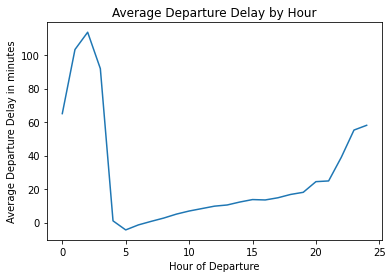

In [44]:
plt.plot(hour_delay.index, hour_delay.values)
plt.xlabel("Hour of Departure")
plt.ylabel("Average Departure Delay in minutes")
plt.title("Average Departure Delay by Hour")
plt.show()

In [48]:
carriers = flights_df.groupby('UniqueCarrier')['FlightNum'].count()
top_10 = carriers.sort_values(ascending=False)[:10]
print(top_10)

UniqueCarrier
WN    398966
AA    204519
OO    195184
MQ    167860
UA    154036
US    153539
DL    151409
XE    138757
NW    122799
CO    102702
Name: FlightNum, dtype: int64


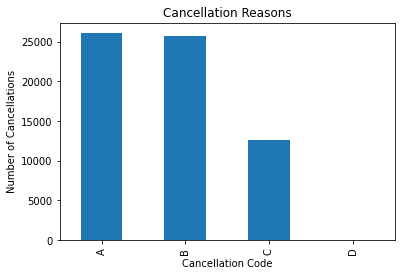

In [49]:
flights_df['CancellationCode'].value_counts().plot(kind='bar')
plt.title('Cancellation Reasons')
plt.xlabel('Cancellation Code')
plt.ylabel('Number of Cancellations')
plt.show()

I cannot access the link to figure out what ea h cancellation code stands for so I chose D

In [50]:
cancellation_counts = flights_df['CancellationCode'].value_counts()
print(cancellation_counts)

A    26075
B    25744
C    12617
D        6
Name: CancellationCode, dtype: int64


In [51]:
flights_df['Route'] = flights_df['Origin'] + ' - ' + flights_df['Dest']
flights_df['Route_Rev'] = flights_df['Dest'] + ' - ' + flights_df['Origin']
routes = pd.concat([flights_df['Route'], flights_df['Route_Rev']])
most_common_route = routes.value_counts().idxmax()
print(most_common_route)

LAX - SFO


In [52]:
delayed_routes = flights_df.groupby(['Origin', 'Dest']).agg({'DepDelay': 'sum', 'WeatherDelay': 'sum'}) \
.rename(columns={'FlightNum': 'TotalFlights'}) \
.sort_values(by='DepDelay', ascending=False) \
.head(5)

print(delayed_routes)

             DepDelay  WeatherDelay
Origin Dest                        
LAX    SFO        inf        3248.0
LGA    ORD        inf        1855.0
ORD    LGA        inf        3980.0
       EWR        inf        2688.0
SFO    LAX        inf        1085.0


In [53]:
weather_delay = delayed_routes['WeatherDelay'].sum()
print(weather_delay)

12856.0


In [54]:
flights_df['Route'] = flights_df['Origin'] + ' - ' + flights_df['Dest']
delayed_routes = flights_df[flights_df['DepDelay'] > 0]['Route'].value_counts().head(5)
print(delayed_routes)
delayed_flights = flights_df[flights_df['Route'].isin(delayed_routes.index)]
weather_delays = delayed_flights[delayed_flights['WeatherDelay'] > 0]['WeatherDelay']
print(weather_delays)

LAX - SFO    2226
DAL - HOU    2063
HOU - DAL    2017
ORD - LGA    1978
SFO - LAX    1901
Name: Route, dtype: int64
483         24.0
3922       202.0
5415        70.0
7095        93.0
7097       150.0
           ...  
2034134     38.0
2088952      6.0
2266487     12.0
2266816     94.0
2267818     13.0
Name: WeatherDelay, Length: 315, dtype: float16


Total number of weather delayed flights is 315

In [57]:
print(type(flights_df['DepTime']))

<class 'pandas.core.series.Series'>


In [59]:
dep_time = flights_df['DepTime'].dropna()
dep_time = dep_time.real.astype(int)
distribution = dep_time // 100
distribution.hist(bins=24)

AttributeError: ignored

In [60]:
flights_df['day'] = flights_df['DayofMonth']
flights_df['Date'] = pd.to_datetime(flights_df[['Year', 'Month', 'day']])
flights_df['Date']

0         2008-01-03
1         2008-01-03
2         2008-01-03
3         2008-01-03
4         2008-01-03
             ...    
2389212   2008-04-17
2389213   2008-04-17
2389214   2008-04-17
2389215   2008-04-17
2389216   2008-04-17
Name: Date, Length: 2389217, dtype: datetime64[ns]

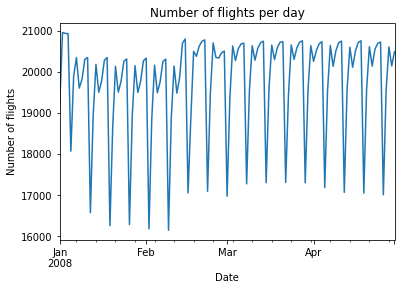

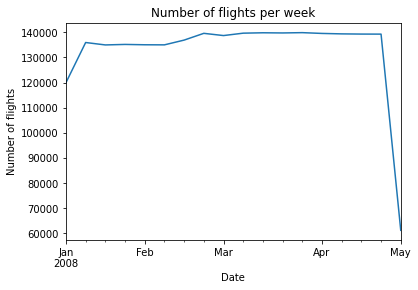

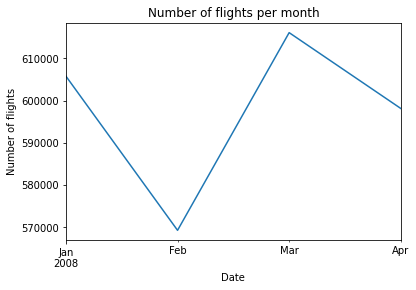

In [61]:
flights_df.groupby('Date').size().plot()
plt.title('Number of flights per day')
plt.xlabel('Date')
plt.ylabel('Number of flights')
plt.show()
# plot the number of flights on a weekly basis
flights_df.groupby(pd.Grouper(key='Date', freq='W')).size().plot()
plt.title('Number of flights per week')
plt.xlabel('Date')
plt.ylabel('Number of flights')
plt.show()
# plot the number of flights on a monthly basis
flights_df.groupby(pd.Grouper(key='Date', freq='M')).size().plot()
plt.title('Number of flights per month')
plt.xlabel('Date')
plt.ylabel('Number of flights')
plt.show()

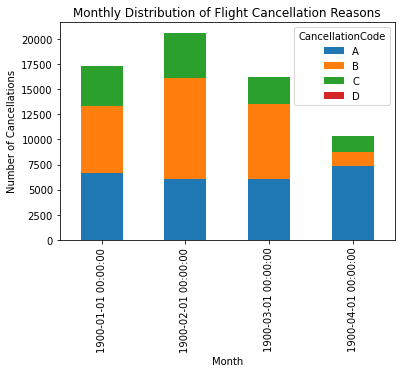

In [62]:
flights_df['Month'] = pd.to_datetime(flights_df['Month'], format='%m')
monthly_cancellations = flights_df.groupby(['Month', 'CancellationCode']).size().unstack()
monthly_cancellations.plot(kind='bar', stacked=True)
plt.title('Monthly Distribution of Flight Cancellation Reasons')
plt.xlabel('Month')
plt.ylabel('Number of Cancellations')
plt.show()

In [64]:
max_month = 4 # Since the last answer is April (4) 
carrier_cancel = flights_df[(flights_df['CancellationCode'] == 'C') & (flights_df['Month'] == max_month)]
carrier_counts = carrier_cancel.groupby(['UniqueCarrier'])['Cancelled'].count()
# Carrier with the highest cancellation count
carrier_counts

Series([], Name: Cancelled, dtype: int64)

Empty Series. 

In [66]:
arrival_delay_threshhold = flights_df['ArrDelay'].quantile(.95)
depature_delay_threshhold = flights_df['DepDelay'].quantile(.95)
df = flights_df[(flights_df['ArrDelay'] >= 0) & (flights_df['ArrDelay'] <= arrival_delay_threshhold)]
df = flights_df[(flights_df['DepDelay'] >= 0) & (flights_df['DepDelay'] <= depature_delay_threshhold)]
# median arrival and departure delays by carrier
median_arr_delay = df.groupby('UniqueCarrier')['ArrDelay'].median()
median_dep_delay = df.groupby('UniqueCarrier')['DepDelay'].median()
# Find the carrier with the lowest median delay time for both arrivals and departures
min_median_delay_carrier = median_arr_delay.index[median_arr_delay.eq(median_arr_delay.min())]
print(min_median_delay_carrier)

Index(['AQ'], dtype='object', name='UniqueCarrier')


The Carrier with the lowest median delay time was 'AQ'

That's it! Now go and do 30 push-ups! :). You are now a guru in Data Manipulation and Analysis with Python

I tried the Push-ups. I almost died after 3.5 attempts. I will now focus on Data Engineering instead. Maybe there's hope there.